In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import tqdm
import time

In [4]:
x=open('ising_mat.npy','rb')
a=np.load(x)
    #del(a)


In [59]:
from tqdm import tqdm
fig,ax=plt.subplots()
ims=[]
N=len(a)
#print(N)
for i in tqdm(range(N)):
    im=ax.imshow(a[i],animated=True)
    if i==0:
        ax.imshow(a[0])
    ims.append([im])

ani = animation.ArtistAnimation(fig,ims,interval=20,blit=True,repeat=False)
#writervideo = animation.FFMpegFileWriter(fps=60)
writervideo = animation.FFMpegWriter(fps=60)
ani.save('ising_simulation.mp4', writer=writervideo)
#plt.close()
#plt.show()
plt.close()

100%|██████████| 12926/12926 [00:06<00:00, 2101.21it/s]


In [9]:
J= 1
def ham(mat):
    N=mat.shape[0]
    H = np.zeros([N,N])
    for i in range(1,N-1):
        H[0][i]=-J*mat[0][i]*(mat[1][i]+mat[0][i-1]+mat[0][i+1])
        H[i][0]=-J*mat[i][0]*(mat[i][1]+mat[i-1][0]+mat[i+1][0])
        H[N-1][i]=-J*mat[N-1][i]*(mat[N-2][i]+mat[N-1][i-1]+mat[N-1][i+1])
        H[i][N-1]=-J*mat[i][N-1]*(mat[i][N-2]+mat[i-1][N-1]+mat[i+1][N-1])
        for j in range(1,N-1):
            H[i][j]=-J*mat[i][j]*(mat[i-1][j]+mat[i][j-1]+mat[i+1][j]+mat[i][j+1])

    H[0][0]=-J*mat[0][0]*(mat[0][1]+mat[1][0])
    H[0][N-1]=-J*mat[0][N-1]*(mat[1][N-1]+mat[0][N-2])
    H[N-1][0]=-J*mat[N-1][0]*(mat[N-2][0]+mat[N-1][1])
    H[N-1][N-1]=-J*mat[N-1][N-1]*(mat[N-1][N-2]+mat[N-2][N-1])

    h_sum = np.sum(H)
    return h_sum
magnet_l = []
ener_l = []
for i in a:
    mag= np.sum(i)
    en = ham(i)
    magnet_l.append(mag)
    ener_l.append(en)

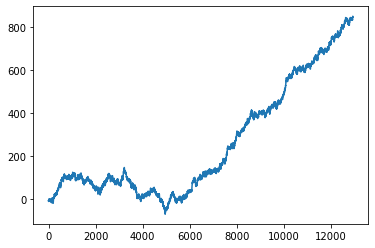

In [6]:
plt.plot(magnet_l)


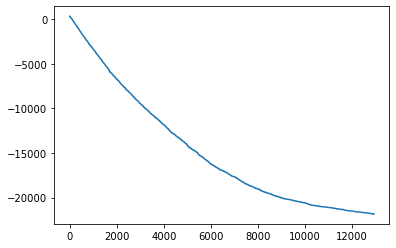

In [10]:
plt.plot(ener_l)